In [1]:
import os
os.chdir("../src/main/python/")

In [58]:
import tables
from matplotlib import pyplot as plt
import numpy as np

# PlatRock Viewer

## Lecture du fichier .hdf5

In [46]:
h5file = tables.open_file("full_output.hdf5")

## Nombre de trajectoires

In [49]:
node = h5file.get_node("/rocks/start_data")
len(node)

1000

## Volume, densité et inertie des blocs

In [50]:
obj = h5file.get_node("/rocks/start_data")
print(obj.read())

[[1.7606909e+00 2.6500000e+03 1.0472540e+03]
 [1.1556913e+00 2.6500000e+03 5.1917828e+02]
 [1.0854410e+00 2.6500000e+03 4.6765314e+02]
 ...
 [7.9572469e-01 2.6500000e+03 2.7873071e+02]
 [6.3242644e-01 2.6500000e+03 1.9007724e+02]
 [9.7365683e-01 2.6500000e+03 3.9017249e+02]]


## Valeurs de sortie du premier bloc

| contact type | $x$ | $z$ | $v_x$ | $v_z$ | $\dot{\theta}$ | $N_x$ | $N_z$ |
| ------------ | --- | --- | ----- | ----- | -------------- | ----- | ----- |

**contact types:**
- 0: start
- 1: soil
- 2: tree
- 3: roll_tree (contact with a tree while rolling)
- 4: roll (for rolling-friction algorithm)
- 5: stop (at the end if the rock was stopped)
- 6: out (at the end if the rock went outside the terrain)
- 7: fly (used for 3D)
- 8: motion

In [66]:
i = 0
obj = h5file.get_node(f"/rocks/contacts/{i}")
#print(obj.read())
print(obj.read()[0:10,:])

[[ 0.0000000e+00  1.9957249e+02  2.0588406e+03  5.0000000e-01
   0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  2.0030124e+02  2.0484316e+03  7.4436636e+00
  -7.0250839e-01  0.0000000e+00  5.4897821e-01  8.3583665e-01]
 [ 1.0000000e+00  2.0799261e+02  2.0424741e+03  8.8792620e+00
  -4.4319220e+00  0.0000000e+00  5.6857640e-01  8.2263047e-01]
 [ 1.0000000e+00  2.1242430e+02  2.0390415e+03  8.7663631e+00
  -5.0300188e+00  0.0000000e+00  5.6499565e-01  8.2509387e-01]
 [ 1.0000000e+00  2.1557317e+02  2.0366025e+03  8.5986176e+00
  -4.2138848e+00  0.0000000e+00  5.1683813e-01  8.5608315e-01]
 [ 1.0000000e+00  2.1986594e+02  2.0332775e+03  8.7228050e+00
  -4.3369155e+00  0.0000000e+00  5.3026062e-01  8.4783471e-01]
 [ 1.0000000e+00  2.2417293e+02  2.0299415e+03  8.5740490e+00
  -5.0526657e+00  0.0000000e+00  5.7207334e-01  8.2020247e-01]
 [ 1.0000000e+00  2.2695242e+02  2.0277886e+03  8.1308384e+00
  -4.6798382e+00  0.0000000e+00  5.5541795e-01  8.3157134e-01]


## Analyse des points d'arrêt

In [67]:
x_end = []
z_end = []

for i in range(1000):
    obj = h5file.get_node(f"/rocks/contacts/{i}")
    if obj.read()[-1, 0] == 5:
        x_end.append(float(obj.read()[-1, 1]))
        z_end.append(float(obj.read()[-1, 2]))
        #print(obj.read()[-1,1:3])

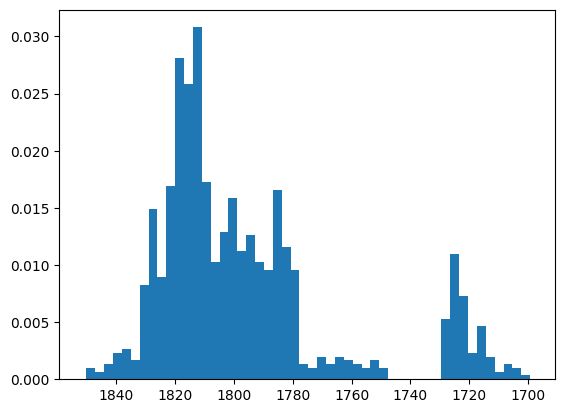

In [109]:
fig, ax = plt.subplots()
ax.set_xlim(max(x_end)*1.005, min(x_end)*0.995)
#r = ax.hist(x_end, bins=50)
r = ax.hist(x_end, bins=50, density=True, stacked=True)
plt.show()

In [110]:
r

(array([0.00033118, 0.00099353, 0.00132471, 0.00066235, 0.00198706,
        0.00463648, 0.00231824, 0.00728589, 0.01092884, 0.00529883,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00099353, 0.00165588, 0.00099353, 0.00132471,
        0.00165588, 0.00198706, 0.00132471, 0.00198706, 0.00099353,
        0.00132471, 0.00960413, 0.01159119, 0.01655885, 0.00960413,
        0.01026649, 0.01258472, 0.01126002, 0.01589649, 0.0129159 ,
        0.01026649, 0.0172212 , 0.03079946, 0.0258318 , 0.02815004,
        0.01689003, 0.00894178, 0.01490296, 0.00827942, 0.00165588,
        0.00264942, 0.00231824, 0.00132471, 0.00066235, 0.00099353]),
 array([1699.22045898, 1702.23999268, 1705.25952637, 1708.27906006,
        1711.29859375, 1714.31812744, 1717.33766113, 1720.35719482,
        1723.37672852, 1726.39626221, 1729.4157959 , 1732.43532959,
        1735.45486328, 1738.47439697, 1741.49393066, 1744.51346436,
        1747.53299805, 1750.55253174, 1753.572

In [112]:
np.cumsum(r[0]*np.diff(r[1]))

array([1.00e-03, 4.00e-03, 8.00e-03, 1.00e-02, 1.60e-02, 3.00e-02,
       3.70e-02, 5.90e-02, 9.20e-02, 1.08e-01, 1.08e-01, 1.08e-01,
       1.08e-01, 1.08e-01, 1.08e-01, 1.08e-01, 1.11e-01, 1.16e-01,
       1.19e-01, 1.23e-01, 1.28e-01, 1.34e-01, 1.38e-01, 1.44e-01,
       1.47e-01, 1.51e-01, 1.80e-01, 2.15e-01, 2.65e-01, 2.94e-01,
       3.25e-01, 3.63e-01, 3.97e-01, 4.45e-01, 4.84e-01, 5.15e-01,
       5.67e-01, 6.60e-01, 7.38e-01, 8.23e-01, 8.74e-01, 9.01e-01,
       9.46e-01, 9.71e-01, 9.76e-01, 9.84e-01, 9.91e-01, 9.95e-01,
       9.97e-01, 1.00e+00])

In [70]:
np.mean(x_end)

1796.6226108398437

In [71]:
np.std(x_end)

31.40929507025226

In [25]:
h5file.walk_groups("/rocks/contacts")

<generator object Group._f_walk_groups at 0x000001F81D9C42E0>

In [35]:
obj = h5file.get_node("/rocks/contacts/")

In [40]:
len(list(obj))

1000

In [14]:
for group in h5file.walk_groups("/rocks/contacts"):
    for array in h5file.list_nodes(group, classname='Array'):
        print(array)

/rocks/contacts/0 (Array(94, 8)) ''
/rocks/contacts/1 (Array(115, 8)) ''
/rocks/contacts/10 (Array(83, 8)) ''
/rocks/contacts/100 (Array(87, 8)) ''
/rocks/contacts/101 (Array(96, 8)) ''
/rocks/contacts/102 (Array(84, 8)) ''
/rocks/contacts/103 (Array(104, 8)) ''
/rocks/contacts/104 (Array(78, 8)) ''
/rocks/contacts/105 (Array(85, 8)) ''
/rocks/contacts/106 (Array(98, 8)) ''
/rocks/contacts/107 (Array(100, 8)) ''
/rocks/contacts/108 (Array(82, 8)) ''
/rocks/contacts/109 (Array(91, 8)) ''
/rocks/contacts/11 (Array(99, 8)) ''
/rocks/contacts/110 (Array(109, 8)) ''
/rocks/contacts/111 (Array(94, 8)) ''
/rocks/contacts/112 (Array(108, 8)) ''
/rocks/contacts/113 (Array(89, 8)) ''
/rocks/contacts/114 (Array(98, 8)) ''
/rocks/contacts/115 (Array(112, 8)) ''
/rocks/contacts/116 (Array(115, 8)) ''
/rocks/contacts/117 (Array(84, 8)) ''
/rocks/contacts/118 (Array(90, 8)) ''
/rocks/contacts/119 (Array(95, 8)) ''
/rocks/contacts/12 (Array(94, 8)) ''
/rocks/contacts/120 (Array(87, 8)) ''
/rocks/conta